In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import warnings
from itertools import product
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)


In [2]:
 final_region = pd.read_csv(r"D:\IE 423\Project\ie423-2024-termproject-the-a-team\ie423-2024-termproject-the-a-team\GlobalIncome_Data\global_income\final_datasets\Final_32_region_deciles_1958-2015.csv")
final_dist=  pd.read_csv(r"D:\IE 423\Project\ie423-2024-termproject-the-a-team\ie423-2024-termproject-the-a-team\GlobalIncome_Data\global_income\final_datasets\Final_Global_Income_Distribution.csv")
final_hist =  pd.read_csv(r"D:\IE 423\Project\ie423-2024-termproject-the-a-team\ie423-2024-termproject-the-a-team\GlobalIncome_Data\global_income\final_datasets\Final_Historical_data_ISO.csv")


In [3]:
print(final_region)

       GCAM_region_ID  year Category  region_shares     gdp_pcap  \
0                   1  1967       d1       0.021295  22688.38327   
1                   1  1967       d2       0.037767  22688.38327   
2                   1  1967       d3       0.049970  22688.38327   
3                   1  1967       d4       0.061608  22688.38327   
4                   1  1967       d5       0.073797  22688.38327   
...               ...   ...      ...            ...          ...   
15695              32  2015       d6       0.068638  12914.89290   
15696              32  2015       d7       0.086548  12914.89290   
15697              32  2015       d8       0.112962  12914.89290   
15698              32  2015       d9       0.158837  12914.89290   
15699              32  2015      d10       0.404873  12914.89290   

            tot_gdp      tot_pop  region_gini  
0      4.687090e+12  206585290.0     0.367954  
1      4.687090e+12  206585290.0     0.367954  
2      4.687090e+12  206585290.0     0.

In [4]:
# Check column names
print("Columns in final_region:")
print(final_region.columns)

print("\nColumns in final_dist:")
print(final_dist.columns)

print("\nColumns in final_hist:")
print(final_hist.columns)

Columns in final_region:
Index(['GCAM_region_ID', 'year', 'Category', 'region_shares', 'gdp_pcap',
       'tot_gdp', 'tot_pop', 'region_gini'],
      dtype='object')

Columns in final_dist:
Index(['GCAM_region_ID', 'year', 'Category', 'global_shares', 'gdp_pcap',
       'tot_gdp', 'tot_pop', 'share_of_richer_pop', 'score', 'global_gini'],
      dtype='object')

Columns in final_hist:
Index(['country', 'iso', 'GCAM_region_ID', 'year', 'REF', 'gini_reported',
       'gdp_ppp_pc_usd2011', 'population', 'Category', 'Income..net.',
       'gini_recalculated', 'Data source'],
      dtype='object')


In [7]:
print(final_region.head())

   GCAM_region_ID  year Category  region_shares     gdp_pcap       tot_gdp  \
0               1  1967       d1       0.021295  22688.38327  4.687090e+12   
1               1  1967       d2       0.037767  22688.38327  4.687090e+12   
2               1  1967       d3       0.049970  22688.38327  4.687090e+12   
3               1  1967       d4       0.061608  22688.38327  4.687090e+12   
4               1  1967       d5       0.073797  22688.38327  4.687090e+12   

       tot_pop  region_gini  
0  206585290.0     0.367954  
1  206585290.0     0.367954  
2  206585290.0     0.367954  
3  206585290.0     0.367954  
4  206585290.0     0.367954  


In [8]:
# Display basic information about the dataset
print(final_region.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15700 entries, 0 to 15699
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GCAM_region_ID  15700 non-null  int64  
 1   year            15700 non-null  int64  
 2   Category        15700 non-null  object 
 3   region_shares   15700 non-null  float64
 4   gdp_pcap        15700 non-null  float64
 5   tot_gdp         15700 non-null  float64
 6   tot_pop         15700 non-null  float64
 7   region_gini     15700 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 981.4+ KB
None


In [33]:
print(final_dist.head())

   GCAM_region_ID  year Category  global_shares  gdp_pcap       tot_gdp  \
0              33  1958       d1          0.029    8643.0  1.159560e+11   
1              33  1958       d2          0.053    8643.0  1.159560e+11   
2              33  1958       d3          0.066    8643.0  1.159560e+11   
3              33  1958       d4          0.076    8643.0  1.159560e+11   
4              33  1958       d5          0.087    8643.0  1.159560e+11   

    tot_pop  share_of_richer_pop   score  global_gini  
0  13416218                  0.9  0.0551       0.2668  
1  13416218                  0.8  0.0901       0.2668  
2  13416218                  0.7  0.0990       0.2668  
3  13416218                  0.6  0.0988       0.2668  
4  13416218                  0.5  0.0957       0.2668  


In [34]:
print(final_hist.head())

       country  iso  GCAM_region_ID  year      REF gini_reported  \
0  Afghanistan  afg              27  1967  afg1967          0.29   
1  Afghanistan  afg              27  1967  afg1967          0.29   
2  Afghanistan  afg              27  1967  afg1967          0.29   
3  Afghanistan  afg              27  1967  afg1967          0.29   
4  Afghanistan  afg              27  1967  afg1967          0.29   

   gdp_ppp_pc_usd2011  population Category  Income..net. gini_recalculated  \
0              1268.0  27722282.0       d1      0.032262       0.290652233   
1              1268.0  27722282.0       d2      0.050450       0.290652233   
2              1268.0  27722282.0       d3      0.061768       0.290652233   
3              1268.0  27722282.0       d4      0.071800       0.290652233   
4              1268.0  27722282.0       d5      0.081803       0.290652233   

                     Data source  
0  Imputed from GINI coefficient  
1  Imputed from GINI coefficient  
2  Imputed from G

In [9]:
# Check for missing values
print(final_region.isnull().sum())

GCAM_region_ID    0
year              0
Category          0
region_shares     0
gdp_pcap          0
tot_gdp           0
tot_pop           0
region_gini       0
dtype: int64


In [10]:
# Check data types of each column
print(final_region.dtypes)





GCAM_region_ID      int64
year                int64
Category           object
region_shares     float64
gdp_pcap          float64
tot_gdp           float64
tot_pop           float64
region_gini       float64
dtype: object


In [11]:
# Count unique values in each column
unique_counts = final_region.nunique()
print(unique_counts)

GCAM_region_ID       32
year                 51
Category             10
region_shares     14169
gdp_pcap           1475
tot_gdp            1475
tot_pop            1468
region_gini        1420
dtype: int64


In [12]:
#Category is a categorical variable: type= object and low unique values(10)
# Visual inspection of unique values in a specific column
print(final_region['Category'].unique())


['d1' 'd2' 'd3' 'd4' 'd5' 'd6' 'd7' 'd8' 'd9' 'd10']


In [13]:
category_counts = final_region['Category'].value_counts()
print(category_counts)


Category
d1     1570
d2     1570
d3     1570
d4     1570
d5     1570
d6     1570
d7     1570
d8     1570
d9     1570
d10    1570
Name: count, dtype: int64


In [14]:
#The counts indicate that each category ('d1' through 'd10') appears 1570 times.
#Balanced Categories: The equal counts for each category suggest a balanced distribution beneficial for classification.
from sklearn.preprocessing import LabelEncoder

# Assuming 'final_region' is your DataFrame and 'Category' is the categorical column
le = LabelEncoder()
final_region['Category_Encoded'] = le.fit_transform(final_region['Category'])


In [15]:
# Using pandas.get_dummies() for One-Hot Encoding
encoded_df = pd.get_dummies(final_region, columns=['Category'], prefix='Category')
print(encoded_df)

       GCAM_region_ID  year  region_shares     gdp_pcap       tot_gdp  \
0                   1  1967       0.021295  22688.38327  4.687090e+12   
1                   1  1967       0.037767  22688.38327  4.687090e+12   
2                   1  1967       0.049970  22688.38327  4.687090e+12   
3                   1  1967       0.061608  22688.38327  4.687090e+12   
4                   1  1967       0.073797  22688.38327  4.687090e+12   
...               ...   ...            ...          ...           ...   
15695              32  2015       0.068638  12914.89290  6.228680e+11   
15696              32  2015       0.086548  12914.89290  6.228680e+11   
15697              32  2015       0.112962  12914.89290  6.228680e+11   
15698              32  2015       0.158837  12914.89290  6.228680e+11   
15699              32  2015       0.404873  12914.89290  6.228680e+11   

           tot_pop  region_gini  Category_Encoded  Category_d1  Category_d10  \
0      206585290.0     0.367954            

In [16]:
#Category_d1 through Category_d10: These binary columns represent each category from the original 'Category' column as True (1) or False (0). 
#For example:
#If a row belongs to 'd1' category, Category_d1 will be True (1) and the rest will be False (0).
#If a row belongs to 'd10' category, Category_d10 will be True (1) and the rest will be False (0).

In [17]:
print(final_dist)


     GCAM_region_ID  year Category  global_shares     gdp_pcap       tot_gdp  \
0                33  1958       d1       0.029000   8643.00000  1.159560e+11   
1                33  1958       d2       0.053000   8643.00000  1.159560e+11   
2                33  1958       d3       0.066000   8643.00000  1.159560e+11   
3                33  1958       d4       0.076000   8643.00000  1.159560e+11   
4                33  1958       d5       0.087000   8643.00000  1.159560e+11   
..              ...   ...      ...            ...          ...           ...   
505              33  2015       d6       0.057436  14696.48898  1.043460e+14   
506              33  2015       d7       0.082744  14696.48898  1.043460e+14   
507              33  2015       d8       0.121720  14696.48898  1.043460e+14   
508              33  2015       d9       0.189988  14696.48898  1.043460e+14   
509              33  2015      d10       0.439563  14696.48898  1.043460e+14   

        tot_pop  share_of_richer_pop   

In [18]:
final_dist.head()

,GCAM_region_ID,year,Category,global_shares,gdp_pcap,tot_gdp,tot_pop,share_of_richer_pop,score,global_gini
0,33,1958,d1,0.029,8643.0,1.159560e+11,13416218,0.9,0.0551,0.2668
1,33,1958,d2,0.053,8643.0,1.159560e+11,13416218,0.8,0.0901,0.2668
2,33,1958,d3,0.066,8643.0,1.159560e+11,13416218,0.7,0.0990,0.2668
3,33,1958,d4,0.076,8643.0,1.159560e+11,13416218,0.6,0.0988,0.2668
4,33,1958,d5,0.087,8643.0,1.159560e+11,13416218,0.5,0.0957,0.2668


In [19]:
# Check for missing values
print(final_dist.isnull().sum())

GCAM_region_ID         0
year                   0
Category               0
global_shares          0
gdp_pcap               0
tot_gdp                0
tot_pop                0
share_of_richer_pop    0
score                  0
global_gini            0
dtype: int64


In [20]:
print(final_hist)

           country  iso  GCAM_region_ID  year      REF gini_reported  \
0      Afghanistan  afg              27  1967  afg1967          0.29   
1      Afghanistan  afg              27  1967  afg1967          0.29   
2      Afghanistan  afg              27  1967  afg1967          0.29   
3      Afghanistan  afg              27  1967  afg1967          0.29   
4      Afghanistan  afg              27  1967  afg1967          0.29   
...            ...  ...             ...   ...      ...           ...   
85215     Zimbabwe  zwe               4  2015  zwe2015     0.4499857   
85216     Zimbabwe  zwe               4  2015  zwe2015     0.4499857   
85217     Zimbabwe  zwe               4  2015  zwe2015     0.4499857   
85218     Zimbabwe  zwe               4  2015  zwe2015     0.4499857   
85219     Zimbabwe  zwe               4  2015  zwe2015     0.4499857   

       gdp_ppp_pc_usd2011  population Category  Income..net.  \
0                  1268.0  27722282.0       d1      0.032262   
1      

In [21]:
final_hist.head()

,country,iso,GCAM_region_ID,year,REF,gini_reported,gdp_ppp_pc_usd2011,population,Category,Income..net.,gini_recalculated,Data source
0,Afghanistan,afg,27,1967,afg1967,0.29,1268.0,27722282.0,d1,0.032262,0.290652233,Imputed from GINI coefficient
1,Afghanistan,afg,27,1967,afg1967,0.29,1268.0,27722282.0,d2,0.050450,0.290652233,Imputed from GINI coefficient
2,Afghanistan,afg,27,1967,afg1967,0.29,1268.0,27722282.0,d3,0.061768,0.290652233,Imputed from GINI coefficient
3,Afghanistan,afg,27,1967,afg1967,0.29,1268.0,27722282.0,d4,0.071800,0.290652233,Imputed from GINI coefficient
4,Afghanistan,afg,27,1967,afg1967,0.29,1268.0,27722282.0,d5,0.081803,0.290652233,Imputed from GINI coefficient


In [22]:
# Check for missing values
print(final_hist.isnull().sum())

country               0
iso                   0
GCAM_region_ID        0
year                  0
REF                   0
gini_reported         0
gdp_ppp_pc_usd2011    0
population            0
Category              0
Income..net.          0
gini_recalculated     0
Data source           0
dtype: int64


In [24]:
# Check for duplicate rows
duplicate_rows = final_hist[final_hist.duplicated()]

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")


No duplicate rows found.


In [23]:
# Check data types of each column
print(final_hist.dtypes)


country                object
iso                    object
GCAM_region_ID          int64
year                    int64
REF                    object
gini_reported          object
gdp_ppp_pc_usd2011    float64
population            float64
Category               object
Income..net.          float64
gini_recalculated      object
Data source            object
dtype: object


In [ ]:
#country,iso,REF,gini_reported,Category,gini_recalculated,Data source     are all catego var

In [25]:
#  Identify outliers using summary statistics (for numerical columns)
print("\nSummary statistics:")
print(final_hist.describe())


Summary statistics:
       GCAM_region_ID          year  gdp_ppp_pc_usd2011    population  \
count    85220.000000  85220.000000        85220.000000  8.522000e+04   
mean        13.404952   1991.044121        12778.183079  3.094734e+07   
std          8.760130     14.154690        16161.450509  1.153225e+08   
min          1.000000   1958.000000          505.000000  1.052100e+04   
25%          5.000000   1979.000000         2896.000000  2.207725e+06   
50%         12.000000   1991.000000         7135.400000  6.669259e+06   
75%         21.000000   2003.000000        16543.200000  1.929479e+07   
max         32.000000   2015.000000       122637.000000  1.397029e+09   

       Income..net.  
count  85220.000000  
mean       0.100069  
std        0.089606  
min        0.000003  
25%        0.045701  
50%        0.075526  
75%        0.117796  
max        0.709478  


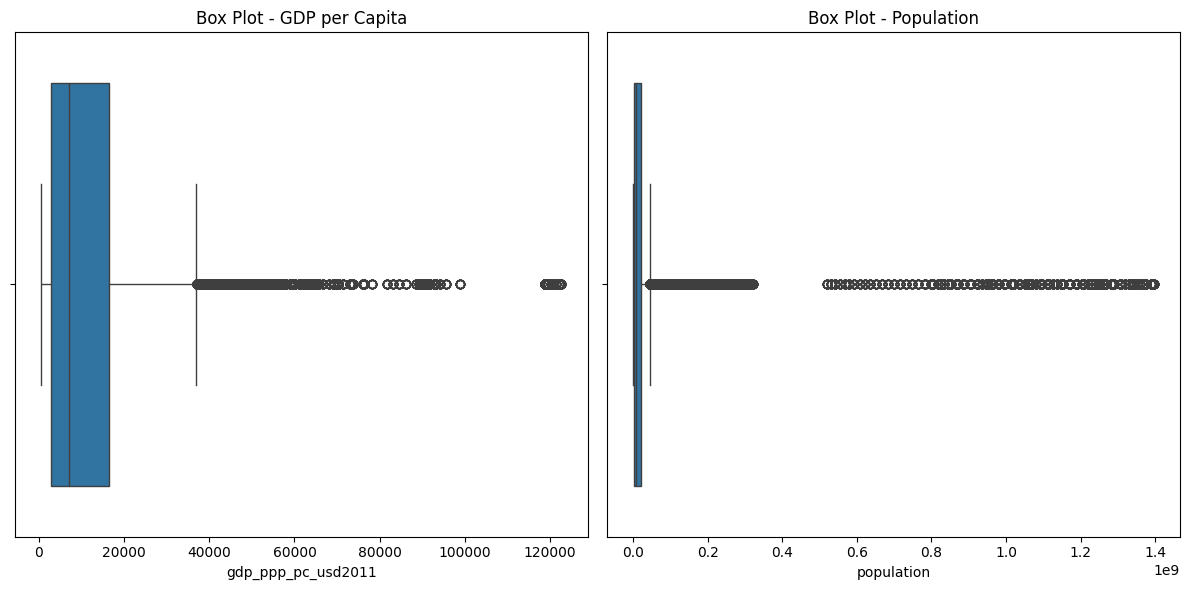

In [26]:
#GDP and population seem to have outliers due to the great range and variation
# Create a figure and axes for plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for 'gdp_ppp_pc_usd2011'
sns.boxplot(x=final_hist['gdp_ppp_pc_usd2011'], ax=axs[0])
axs[0].set_title('Box Plot - GDP per Capita')

# Box plot for 'population'
sns.boxplot(x=final_hist['population'], ax=axs[1])
axs[1].set_title('Box Plot - Population')

# Adjust layout
plt.tight_layout()
plt.show()


In [31]:
#After 40,000 in GDP and at almost 0.2 in population outliers started
#Clean outliers 
import pandas as pd
import numpy as np

# Assuming you have already loaded the DataFrame final_hist

# Calculate z-scores for 'gdp_ppp_pc_usd2011' and 'population'
z_scores_gdp = np.abs((final_hist['gdp_ppp_pc_usd2011'] - final_hist['gdp_ppp_pc_usd2011'].mean()) / final_hist['gdp_ppp_pc_usd2011'].std())
z_scores_population = np.abs((final_hist['population'] - final_hist['population'].mean()) / final_hist['population'].std())

# Define threshold for outliers (e.g., z-score > 3)
outlier_threshold = 2

# Filter rows with outliers for 'gdp_ppp_pc_usd2011'
cleaned_final_hist = final_hist[(z_scores_gdp <= outlier_threshold) & (z_scores_population <= outlier_threshold)]

# Display cleaned DataFrame
print("DataFrame after removing outliers:")
print(cleaned_final_hist.head())


DataFrame after removing outliers:
       country  iso  GCAM_region_ID  year      REF gini_reported  \
0  Afghanistan  afg              27  1967  afg1967          0.29   
1  Afghanistan  afg              27  1967  afg1967          0.29   
2  Afghanistan  afg              27  1967  afg1967          0.29   
3  Afghanistan  afg              27  1967  afg1967          0.29   
4  Afghanistan  afg              27  1967  afg1967          0.29   

   gdp_ppp_pc_usd2011  population Category  Income..net. gini_recalculated  \
0              1268.0  27722282.0       d1      0.032262       0.290652233   
1              1268.0  27722282.0       d2      0.050450       0.290652233   
2              1268.0  27722282.0       d3      0.061768       0.290652233   
3              1268.0  27722282.0       d4      0.071800       0.290652233   
4              1268.0  27722282.0       d5      0.081803       0.290652233   

                     Data source  
0  Imputed from GINI coefficient  
1  Imputed from G

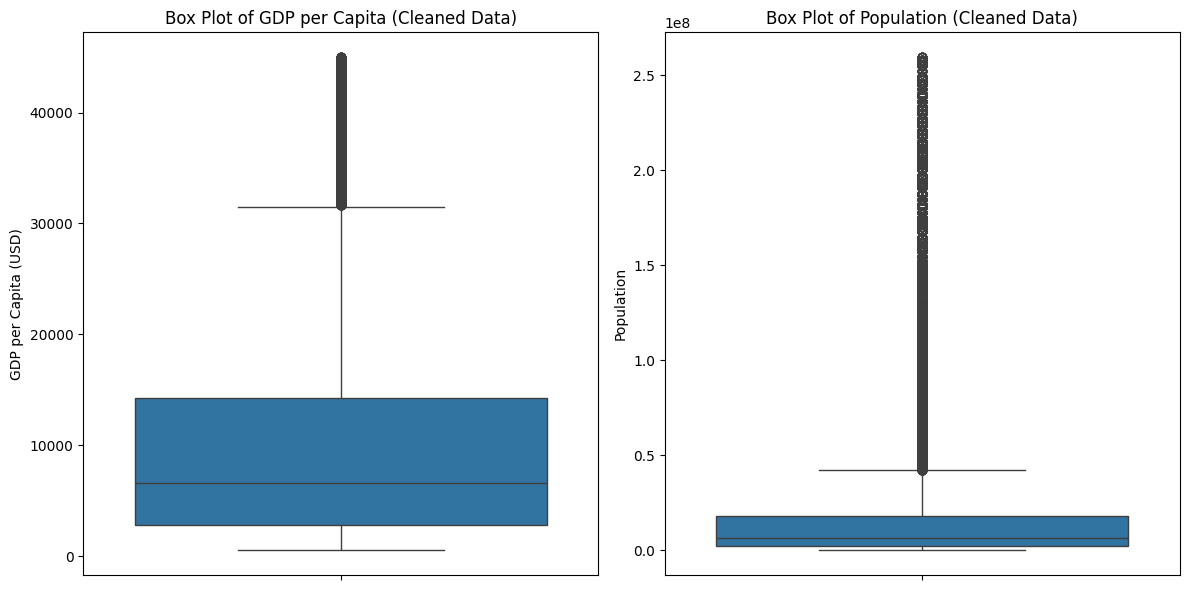

In [32]:

# Create separate box plots for 'gdp_ppp_pc_usd2011' and 'population'
plt.figure(figsize=(12, 6))

# Box plot for 'gdp_ppp_pc_usd2011'
plt.subplot(1, 2, 1)
sns.boxplot(y=cleaned_final_hist['gdp_ppp_pc_usd2011'])
plt.title('Box Plot of GDP per Capita (Cleaned Data)')
plt.ylabel('GDP per Capita (USD)')

# Box plot for 'population'
plt.subplot(1, 2, 2)
sns.boxplot(y=cleaned_final_hist['population'])
plt.title('Box Plot of Population (Cleaned Data)')
plt.ylabel('Population')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
